In [12]:
library("rjags")

In [11]:
mod_string = " model {
  for (i in 1:n) {
    y[i] ~ dnorm(mu, 1.0/sig2)
  }
  mu ~ dt(0.0, 1.0/1.0, 1.0) # location, inverse scale, degrees of freedom
  sig2 = 1.0
} "

In [13]:
set.seed(50)
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
n = length(y)

In [14]:
data_jags = list(y=y, n=n)
params = ("mu")

In [15]:
inits = function(){
    inits = list("mu"=0.0)
}

In [16]:
mod = jags.model(textConnection(mod_string), data=data_jags, inits = inits)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 1
   Total graph size: 28

Initializing model



In [17]:
update(mod, 500)

In [18]:
mod_sim = coda.samples(model = mod, variable.names = params, n.iter = 1000)

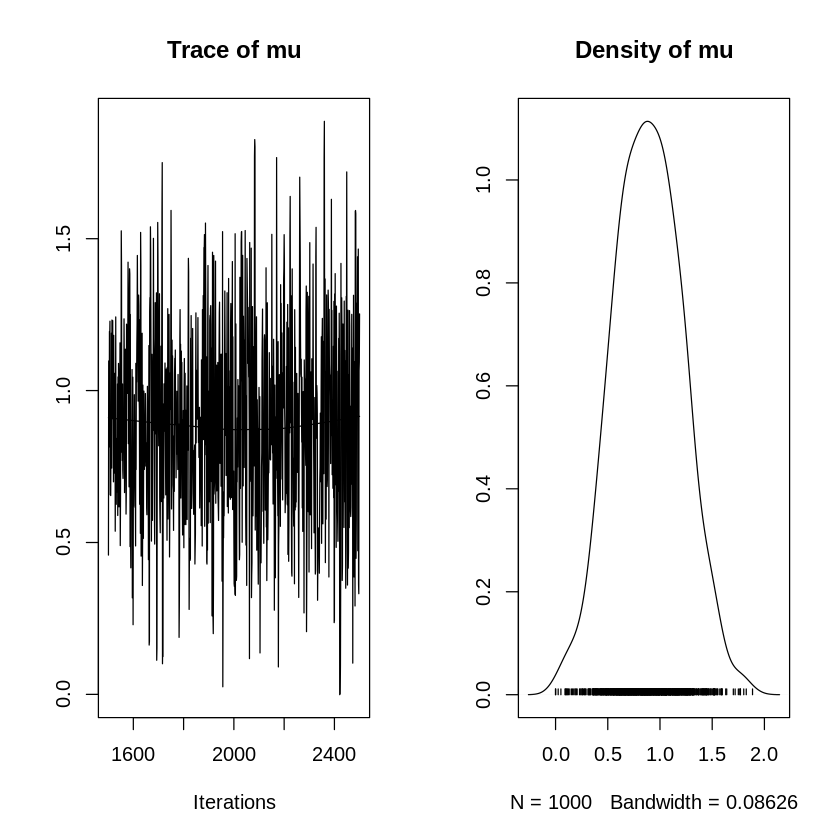

In [19]:
# post processing
library("coda")
plot(mod_sim)

In [21]:
summary(mod_sim)


Iterations = 1501:2500
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
       0.88738        0.32398        0.01025        0.01326 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.2680 0.6562 0.8823 1.1151 1.5217 
